# Day 3 Tutorials: Natural Language Processing in Humans and Machines

## NLP in Machine: Insights from NLP research

### 1.   Introduction
### 2.   FLAN-T5
### 3.   LLAMA
### 4.   RAG


## **1. INTRODUCTION**

### **1.1. LANGUAGE MODELS ARE TRAINED TO PREDICT MISSING WORDS:**
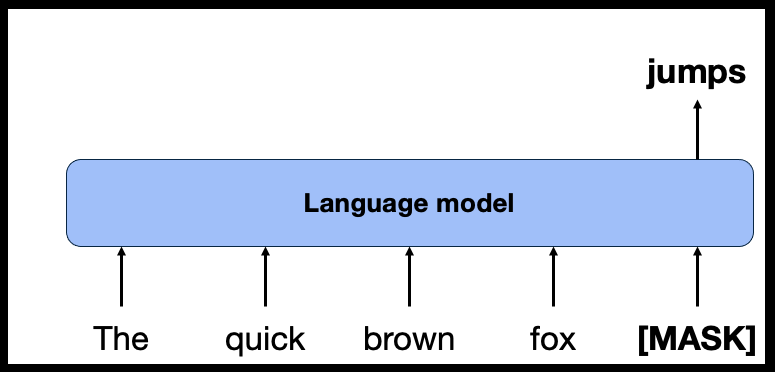

### **1.2. TRANSFORMERS:**

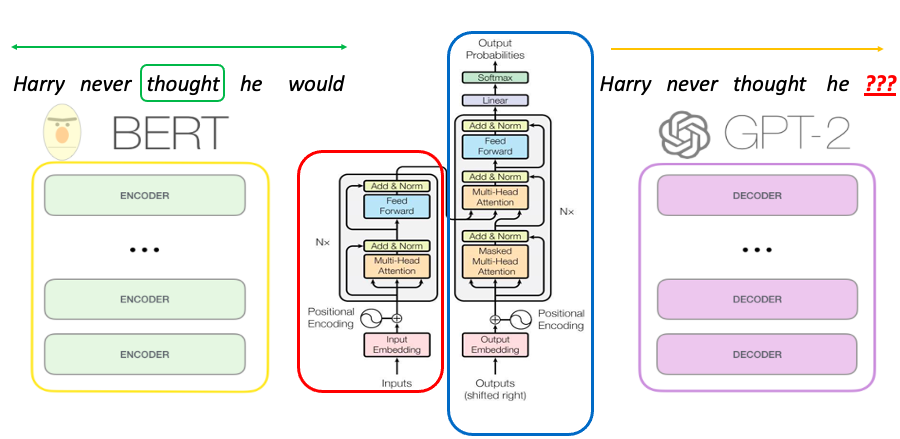

### **1.3. DECODER vs. ENCODER:**

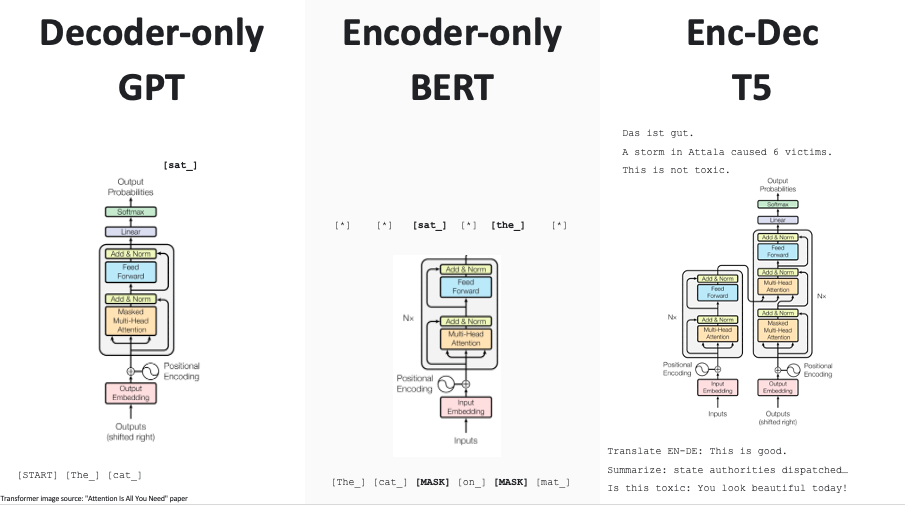

### **1.4. FINE-TUNING: TUNE PRETRAINED LANGUAGE MODEL ON A TASK**
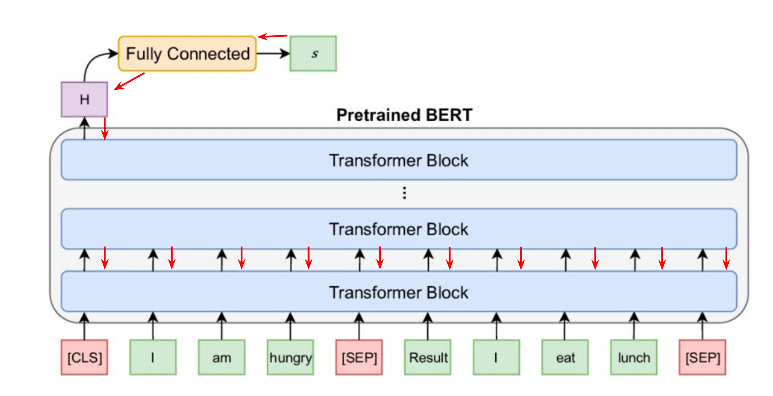

### **1.5. TASK-SPECIFIC LANGUAGE MODELS:**
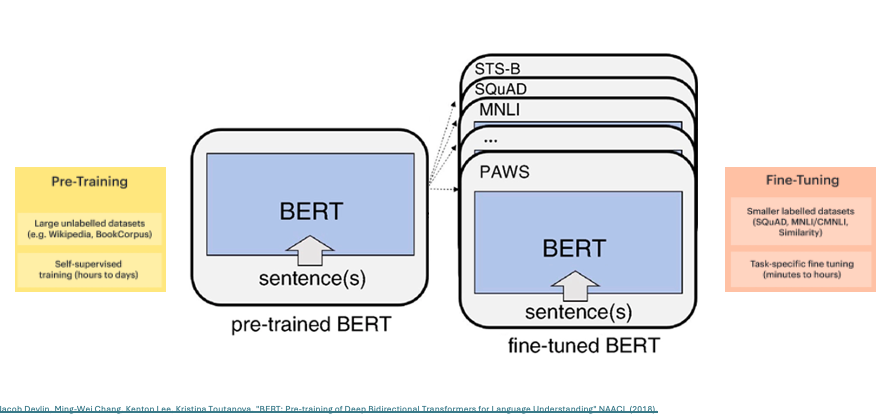

### **1.6. T5 (TEXT-TO-TEXT TRANSFER TRANSFORMER): WORKFLOW**
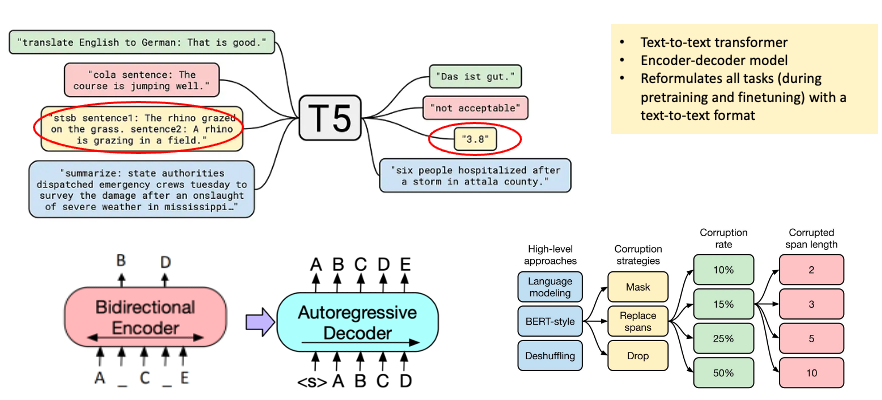

### **1.7. PROMPTING:**
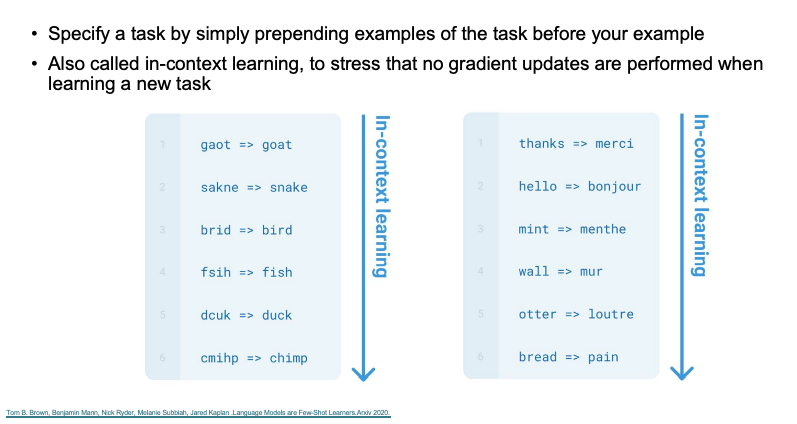

### **1.8. INSTRUCTION-TUNING:**
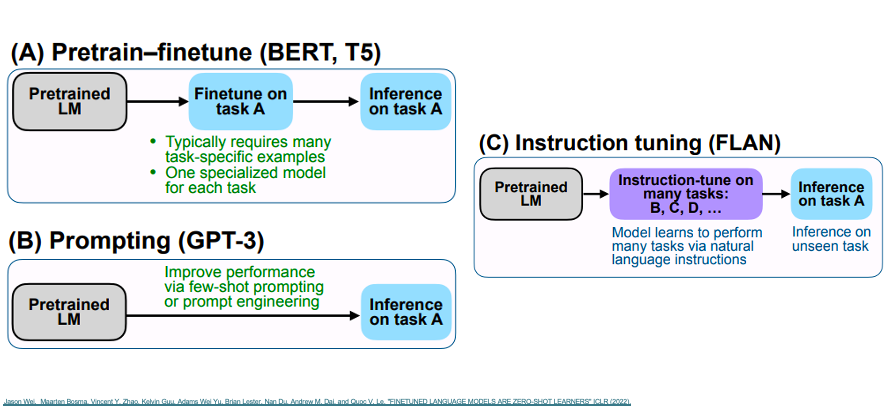

## **2. FLAN-T5:**
Flan-T5 is an open-source LLM that’s available for commercial usage. Published by Google researchers, Flan-T5 is an encoder-decoder model pre-trained on a variety of language tasks. The model has been trained on supervised and unsupervised datasets with the goal of learning mappings between sequences of text, i.e., text-to-text.

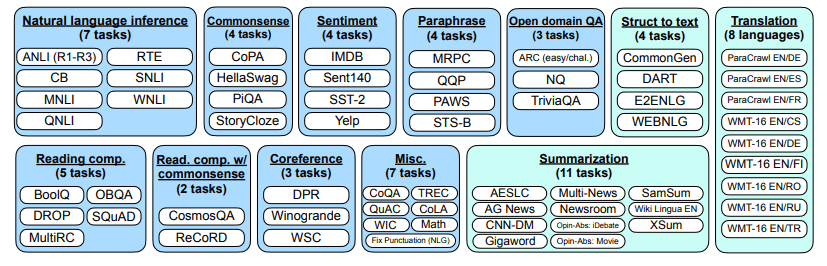

### **2.1. Import Required Libraries**

In [1]:
# Link: https://huggingface.co/collections/google/flan-t5-release-65005c39e3201fff885e22fb
# !pip install --upgrade transformers

from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM

### **2.2. Load the Flan-T5 model and Tokenizer using Transformer Library**

In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base", max_length=20)
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", output_hidden_states=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

### **2.3. Function Calling to Generate output for Different Input Tasks**

In [ ]:
def generate(input_text):
  input_ids = tokenizer(input_text, return_tensors="pt")
  output = model.generate(**input_ids, max_length=100)
  return tokenizer.decode(output[0], skip_special_tokens=True)

### **2.4. Translation Task**

In [ ]:
input_text = """translate the following sentence to German:
                How old are you?"""
generate(input_text)

'Wie old sind Sie?'

###  **2.5. Provide Reasoning for Generated Output**

In [ ]:
input_text = """
Answer the following question by reasoning step by step.
The cafeteria had 23 apples. If the used 20 for lunch and bougth 6 more, how many apples do they have?
"""
generate(input_text)

'The cafeteria had 23 - 20 = 9 apples. The cafeteria had 9 + 6 = 10 apples. Therefore, the answer is 10.'

### **2.6. Checking the Factual Capabilities while Answering**

In [ ]:
input_text = """
Q: Can Obama have a conversation with George Washington?
Give the rationale before answering
"""
generate(input_text)

'George Washington was born in 1789. Obama was born in 1803. So the final answer is no.'

### **2.7. Educational Chatbot: Course Recommendation (1-shot Prompting)**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A student is interested in learning data science and has completed a beginner course in Python. Should they enroll in an advanced data science course?
A: Since the student has completed a beginner course in Python, they have the foundational skills needed for an advanced data science course. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A student wants to enroll in an advanced machine learning course but has no prior experience in programming. Is it advisable to start with this course?
A:
"""
generate(input_text)

'No, the course is not a prerequisite for a student to be able to learn programming. The answer is no.'

### **2.8. Insurance Chatbot: Claim Eligibility**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A policyholder has comprehensive auto insurance and their car was damaged in a flood. Is the damage likely to be covered by their insurance policy?
A: Comprehensive auto insurance typically covers damage from natural disasters like floods. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A policyholder has liability-only auto insurance and their car was damaged in a flood. Is the damage likely to be covered by their insurance policy?
A:
"""
generate(input_text)

'Comprehensive auto insurance typically covers damage from natural disasters like floods. The answer is yes.'

### **2.9. Sales Chatbot: Discount Eligibility**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A customer has purchased products worth $500. Is the customer eligible for a 10% discount if the minimum purchase requirement is $300?
A: The customer’s purchase amount exceeds the minimum requirement of $300, making them eligible for the 10% discount. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A customer wants to use a discount coupon that is valid only for electronics. They are purchasing a book. Is the coupon applicable?
A:
"""
generate(input_text)

'The coupon is valid for electronics and not for books. The answer is no.'

### **2.10. Sales Chatbot: Product Recommendation**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A customer is looking for a laptop with high processing power, a large screen, and a long battery life. Would a gaming laptop be a suitable recommendation?
A: Gaming laptops typically have high processing power, large screens, and are designed to handle intensive tasks, though battery life may vary. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A customer needs a lightweight, portable laptop for frequent travel, mainly for word processing and web browsing. Would a gaming laptop be suitable?
A:
"""
generate(input_text)

'Gaming laptops are lightweight, portable, and portable. The answer is yes.'

### **2.11. Medical Chatbot: Medication Advice**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A patient is allergic to penicillin. Could prescribing amoxicillin be a risk?
A: Amoxicillin is a type of penicillin antibiotic, so prescribing it to someone allergic to penicillin could be risky. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A patient with high blood pressure is advised to take a decongestant for a cold. Could this medication affect their condition?
A: Some decongestants can raise blood pressure. Since the patient already has high blood pressure, taking a decongestant could potentially worsen their condition. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A patient with diabetes is experiencing a cough and cold. They are considering taking over-the-counter cough syrup. Could this medication impact their blood sugar levels?
A: Some cough syrups contain sugar or alcohol, which can affect blood sugar levels. Since the patient has diabetes, taking such a medication could lead to fluctuations in blood sugar. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A patient is taking blood thinners and needs to manage pain from a minor injury. They are considering taking ibuprofen. Could this choice increase their risk of complications?
A: Ibuprofen is a non-steroidal anti-inflammatory drug (NSAID) that can increase the risk of bleeding, especially in patients taking blood thinners. This could lead to complications such as gastrointestinal bleeding. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A patient with asthma is considering using a beta-blocker for anxiety. Could this medication choice exacerbate their asthma symptoms?
A:
"""
generate(input_text)

'A beta-blocker is a medication that is used to treat anxiety. A beta-blocker is a medication that is used to treat anxiety. The answer is yes.'

### **2.12. Medical Chatbot: Symptom Checker**

In [ ]:
input_text = """
Q: Answer the following yes/no question by reasoning step-by-step.
A patient reports experiencing a high fever, sore throat, and difficulty swallowing. Could these symptoms be indicative of strep throat?
A: Strep throat is commonly associated with a high fever, sore throat, and difficulty swallowing. Therefore, these symptoms could indicate strep throat. The answer is yes.

Q: Answer the following yes/no question by reasoning step-by-step.
A patient mentions they have a sore throat but no fever. Is it likely that they have the flu?
A:
"""
generate(input_text)

'The sore throat is not a sign of the flu. The answer is no.'

### **2.13. Chain of Thought Prompting**
Mathematical Chatbot: solving 10 digit addition

In [ ]:
input_text = """
Q: Answer the following question by reasoning step-by-step.
What is the sum of 2 and 3?
A: To solve this, let's break it down step by step.
   First, align the numbers by their place values:
   2
+  3
--------------
  5

   The sum is 5.

Q: Answer the following question by reasoning step-by-step.
What is the sum of 120 and 203?
A: To solve this, let's break it down step by step.
   First, align the numbers by their place values:

   120
+  203
--------------
  323

   The sum is 323.

Q: Answer the following question by reasoning step-by-step.
What is the sum of 5798 and 3098?
A: To solve this, let's break it down step by step.
   First, align the numbers by their place values:

   5798
+  3098
--------------
  8896

   The sum is 8896.

Q: Answer the following question by reasoning step-by-step.
What is the sum of 1234567890 and 987654321?
A: To solve this, let's break it down step by step.
   First, align the numbers by their place values:

   1234567890
+   987654321
--------------
"""
generate(input_text)

'The sum of 1234567890 and 987654321 is 1234567890 + 987654321 = 108. The sum is 108.'

## **3. LLAMA**

### **3.1. Import Required Libraries**

In [ ]:
# !pip install -i https://pypi.org/simple/ bitsandbytes
# !pip install accelerate
# !pip install -U bitsandbytes
!pip install accelerate peft bitsandbytes transformers trl

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00


In [ ]:
# Link: https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct
# Link: https://huggingface.co/unsloth/llama-3-8b-bnb-4bit
# Link: https://huggingface.co/unsloth/llama-3-8b-Instruct-bnb-4bit
# !pip install -i https://pypi.org/simple/ bitsandbytes
# !pip install accelerate
# !pip install -U bitsandbytes

import transformers
import torch
import bitsandbytes
import accelerate

### **3.2. Download Llama 3 8B**

In [ ]:
model_id_base= "unsloth/llama-3-8b-bnb-4bit"
model_id_instruction = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline_base = transformers.pipeline(
    "text-generation",
    model=model_id_base,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

pipeline_instruction = transformers.pipeline(
    "text-generation",
    model=model_id_instruction,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(

model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

### **3.3. Base Model vs. Instruction-tuned Model**

* The Llama-3-8B model is a pretrained model.
* The Llama-3-8B instruction tuned models are optimized for dialogue use cases and outperform many of the available open source chat llm on common industry benchmarks

### **3.4. Query Llama 3**

In [ ]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """What is the meaning of life?"""},
]

prompt = pipeline_instruction.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline_instruction.tokenizer.eos_token_id,
    pipeline_instruction.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline_instruction(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

What a profound and complex question! The meaning of life is a topic that has puzzled philosophers, scientists, and thinkers for centuries. While there may not be a definitive answer, I can offer some insights and perspectives to help you explore this question.

The meaning of life is a deeply personal and subjective concept that can vary greatly from person to person. For some, it may be a sense of purpose, a feeling of fulfillment, or a connection to something greater than themselves. For others, it may be a pursuit of happiness, a desire for knowledge, or a quest for self-improvement.

Here are some possible ways to approach the question of the meaning of life:

1. **Purpose**: Some people find meaning in their purpose, whether it's a career, a relationship, a hobby, or a sense of service to others. When we have a sense of purpose, we feel more directed and motivated, which can bring a sense of fulfillment and satisfaction.
2. **Values**: Living in accordance with one's values can b

## **4. RAG (Retrieval-Augmented Generation)**

<p align="center">
  <img src="https://docs.aws.amazon.com/images/sagemaker/latest/dg/images/jumpstart/jumpstart-fm-rag.jpg" alt="RAG Pipeline" width="60%">
</p>

### **4.1. Simple RAG example with Langchain, Ollama and and open-source LLM model**

In this example, we first connect to an LLM locally and make request to the LLM that Ollama is serving using LangChain. After that, we generate our RAG application from a TXT file and extract details from that document.

<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/07/langchain3.png" alt="Langchain Logo" width="20%">
  <img src="https://bookface-images.s3.amazonaws.com/logos/ee60f430e8cb6ae769306860a9c03b2672e0eaf2.png" alt="Ollama Logo" width="20%">
</p>

**Sources:**
* https://github.com/svpino/llm
* https://github.com/AIAnytime/Gemma-7B-RAG-using-Ollama/blob/main/Ollama%20Gemma.ipynb
* https://www.youtube.com/watch?v=-MexTC18h20&ab_channel=AIAnytime
* https://www.youtube.com/watch?v=HRvyei7vFSM&ab_channel=Underfitted


**Requirements:**
* Ollama installed locally

### **4.2. Install Requirements**

If an error is raised related to docarray, refer to this solution:
https://stackoverflow.com/questions/76880224/error-using-using-docarrayinmemorysearch-in-langchain-could-not-import-docarray

In [ ]:
!pip3 install langchain
!pip3 install langchain_community
!pip3 install langchain_pinecone
!pip3 install langchain[docarray]
!pip3 install docarray
!pip install langchain_chroma
!pip install colab-xterm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49

### **4.3. Select LLM to Use and Start the Server on Colab**

The model must be downloaded locally to be used, so if you want to run llama3, you should run:

```
ollama pull llama3
```

Check the list of models available for Ollama here: https://ollama.com/library

In [ ]:
#MODEL = "gpt-3.5-turbo"
#MODEL = "mixtral:8x7b"
#MODEL = "gemma:7b"
#MODEL = "llama2"
MODEL = "llama3" # https://ollama.com/library/llama3

In [ ]:

%load_ext colabxterm
%xterm

# Inside the xterm terminal (opened within the Colab cell), type the following command to install Ollama:

# curl -fsSL https://ollama.com/install.sh | sh

# Then start llama3 with the following (will take some time):

# ollama pull llama3

# ollama serve & ollama run llama3

Launching Xterm...

<IPython.core.display.Javascript object>

### **4.4. Instanciate LLM and Embedding Model**

In [ ]:
from langchain_community.llms import Ollama

model = Ollama(model=MODEL)

print(model.invoke("Should I buy an iPhone? Output short answer."))

Whether or not to buy an iPhone depends on your personal preferences, needs, and budget. Here are some points to consider:

**Pros:**

1. Ease of use: iPhones are generally easy to set up and use.
2. Ecosystem: If you're already invested in the Apple ecosystem (e.g., Mac, iPad), an iPhone can integrate seamlessly with those devices.
3. App selection: The App Store offers a wide variety of high-quality apps.
4. Security: iPhones are considered secure due to their closed system and regular software updates.

**Cons:**

1. Cost: iPhones tend to be more expensive than other smartphones on the market.
2. Limited customization: iOS has a limited number of customization options compared to some Android devices.
3. No expandable storage: The iPhone does not have a microSD card slot, so you're stuck with the internal storage capacity.

**Ask yourself:**

1. Are you already invested in the Apple ecosystem?
2. Do you value ease of use and security?
3. Are you willing to pay a premium for an iPhon

### **4.5. Parsing Output**
Using a parser provided by LangChain, we can transform the LLM output to something more suitable to be read

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
response_from_model = model.invoke("Should I buy an iPhone? Output short answer.")
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Whether you should buy an iPhone depends on your personal preferences, needs, and budget. Here are some points to consider:

**Pros:**

1. Ease of use: iPhones are generally easy to set up and navigate.
2. Ecosystem: If you're already invested in the Apple ecosystem (e.g., Mac, iPad), an iPhone integrates seamlessly with those devices.
3. App selection: The App Store offers a vast array of high-quality apps, including many exclusive to iOS.

**Cons:**

1. Cost: iPhones tend to be pricier than some other smartphones.
2. Limited customization: Apple's closed system means you have limited options for customizing your home screen or adding features.
3. No expandable storage: You're stuck with the internal storage capacity, which may not be sufficient for heavy users.

**Ultimately:**

If you value ease of use, want a seamless ecosystem experience, and don't mind the cost, an iPhone might be a great choice. However, if you prioritize customization or are looking for a more affordable option

### **4.6. Generate Template for Conversation with LLM**

We can create a template to structure the conversation effectively.

This template allows us to provide some general context to the Language Learning Model (LLM), which will be utilized for every prompt. This ensures that the model has a consistent background understanding for all interactions.

Additionally, we can include specific context relevant to the particular prompt. This helps the model understand the immediate scenario or topic before addressing the actual question. Following this specific context, we then present the actual question we want the model to answer.

By using this approach, we enhance the model's ability to generate accurate and relevant responses based on both the general and specific contexts provided.

In [ ]:
from langchain.prompts import PromptTemplate

template = """
Answer the question based on the context below. If you can't
answer the question, answer with "I don't know".

Context: {context}

Question: {question}
"""

prompt = PromptTemplate.from_template(template)
prompt.format(context="Here is some context", question="Here is a question")

'\nAnswer the question based on the context below. If you can\'t\nanswer the question, answer with "I don\'t know".\n\nContext: Here is some context\n\nQuestion: Here is a question\n'

The model can answer questions based on the context:

In [ ]:
# without context
model.invoke("What is your name?")

"I don't have a personal name. I'm an AI, so I exist solely as a digital entity designed to assist and communicate with humans. You can think of me as a helpful tool or a conversational partner, but I don't have a personal identity or a physical presence. I'm simply here to provide information, answer questions, and engage in productive conversations!"

In [ ]:
# with context
formatted_prompt = prompt.format(context="My parents named me Sergio.", question="What's your name?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Sergio.


But it can't answer what is not provided as context:

In [ ]:
formatted_prompt = prompt.format(context="My parents named me Sergio.", question="What's my age?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know.


Even previously known info!

In [ ]:
formatted_prompt = prompt.format(context="My parents named me Sergio.", question="What is 2+2?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know


### **4.7. Load an Example File and Store it in a Vector Space**

For the example, you can select your own File.



The execution time of the following block depends on the complexity and longitude of the PDF provided. Try to keep it small and simple for the example.

In [ ]:
!wget https://github.com/MHS-APCS-Hartman/consumer-review-ellapruch/blob/master/26WestReview.txt

--2024-10-08 10:27:21--  https://github.com/MHS-APCS-Hartman/consumer-review-ellapruch/blob/master/26WestReview.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘26WestReview.txt’

26WestReview.txt        [  <=>               ] 314.55K  1.02MB/s    in 0.3s    

2024-10-08 10:27:22 (1.02 MB/s) - ‘26WestReview.txt’ saved [322099]



In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from langchain_community.embeddings import OllamaEmbeddings

embeddings = OllamaEmbeddings(model=MODEL)

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = TextLoader('./26WestReview.txt').load()
text_splitter = CharacterTextSplitter(chunk_size=3000, chunk_overlap=100)
documents = text_splitter.split_documents(raw_documents)
db = Chroma.from_documents(documents, embeddings)


### **4.9. Create Retriever**
We create retriever of vectors that are similar to be used as context

In [ ]:
retriever = db.as_retriever(search_kwargs={"k": 1}) # k is the number of related documents


### **4.10. Generate conversation with the document to extract the details**
We assume retriever is an instance of a retriever class and has a method to retrieve context

In [ ]:
retrieved_context = retriever.invoke("Navesink river")
len(retrieved_context)


1

In [ ]:
questions = [
    "Based on the context, should I visit Navesink river? Give reasons.",
]

for question in questions:
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)

    print(f"Question: {question}")
    print(f"Answer: {parsed_response}")
    print()

Question: Based on the context, should I visit Navesink river? Give reasons.
Answer: Based on the provided context, it seems that the author is recommending a dining experience at an unspecified location, rather than a destination like Navesink River. The text describes their meal at this restaurant, highlighting the quality of the food and atmosphere.

There is no mention of Navesink River or any specific attractions related to it in the provided context. Therefore, I would not be able to provide reasons for visiting Navesink River based on this information.



### **4.11. Loop to Ask-Answer Questions Continously**

In [ ]:
while True:
    print("Say 'exit' or 'quit' to exit the loop")
    question = input('User question: ')
    print(f"Question: {question}")
    if question.lower() in ["exit", "quit"]:
        print("Exiting the conversation. Goodbye!")
        break
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)
    print(f"Answer: {parsed_response}")
    print()

Say 'exit' or 'quit' to exit the loop
User question: quit
Question: quit
Exiting the conversation. Goodbye!
